# MCT4052 Workshop 3c: Artificial Neural Network Classifier

*Author: Stefano Fasciani, stefano.fasciani@imv.uio.no, Department of Musicology, University of Oslo.*

This notebook shows how to train and use an ANN (within the scikit learn package) for classification purposes. The dataset, features extraction and classification problem are identical to the example in Workshop2c, but we replace the Gaussian naïve Bayesian classifier with a Multi Layer Perceptron (MLP, i.e. a Feed Forward fully-connected ANN). Also, the feature set has been slightly changed compared to Workshop2c.


When working with neural networks (for both regression and classification tasks) there are many hyper-parameters we can tune (architecture, activation function, learning rate, etc..).

To get a basic understanding of how these may impact the result, explore this **[demo](https://playground.tensorflow.org/)**.

In particular here we use the [MLP Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) which is an ANN designed to solve classification tasks. We can customize everything except the actual output layer, which is designed to produce one (or more, but this is unusual) discrete or binary labels (e.g. integer numbers).

In [1]:
import numpy as np
import pandas as pd
import librosa, librosa.display
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
import IPython.display as Ipd
import os
import sklearn

%matplotlib inline
%config IPCompleter.greedy=True

In [2]:
#loading the metadata in a pandas data structure and displaying
metadata = pd.read_csv('./data/examples4/meta.csv')

In [3]:
#finding unique labels (i.e. how many different classes in the dataset)
classes = list(metadata.label.unique()) # finding unique elements in the 'label' column
print('There are',len(classes),'different classes:',classes)

There are 5 different classes: ['cello', 'guitar', 'clarinet', 'flute', 'harmonica']


In [4]:
sr = 22050

#Instead of writing the code to extract the features we define a function,
#which is more elegant, it's reusable (shorter code) and makes the following code more readable.
#All features are from librosa and are all scalar (we take the mean over multiple blocks computed across the duration, which differs for each file).
#The function returns a list containing the mean of the features given an filename, and the sampling rate at which we are resampling the file
#Mind that these features may not be the best to perform the classification task (it's just an example!)
def extract_features(filename, sr):
    
    signal, dummy = librosa.load(filename, sr, mono=True)
    
    output = np.mean(librosa.feature.mfcc(signal, n_mfcc=20), axis=1)
    
    return output

print('number of files in database',len(metadata.index))
#creating an array of zeros of the proper size where we will store computed features and lables
features = np.zeros((len(metadata.index),20)) #we compute the average of 3 features in the above code
labels = np.zeros((len(metadata.index))) #we store the labels as integers

#iterating over the rows of metadata
for i, row in metadata.iterrows():
    #print('processing',row['filename'])
    features[i,:] = extract_features('./data/examples4/'+row['filename'], sr)
    labels[i] = (classes.index(row['label']))

print('Done!')

number of files in database 60
Done!


In [5]:
#this step converts the labels from a numpy array to 
#a Pandas series, which allows backtracing misclassified examples
#scikitlearn can handle features or labels also as Pandas formats
labels = pd.Series(labels)

In [6]:
from sklearn.model_selection import train_test_split

#splitting the dataset in training and testing parts
feat_train, feat_test, lab_train, lab_test = train_test_split(features, labels, test_size=0.2, random_state=52)

In [7]:
#learning the scaling transformation from the train data and applying it to both train and test set.

#creating scaling object
scaler = sklearn.preprocessing.StandardScaler()

#learning scaling from train set
scaler.fit(feat_train)

#applying scaling to both train and test set
feat_train = scaler.transform(feat_train)
feat_test = scaler.transform(feat_test)

### Creating, training and testing the Multi Layer Perceptron (MLP) classifier

Compared to other classifiers, here we can specify more options such as the architecture of the network, the activation function of the perceptrons, the maximum number of iterations/epochs, etc).

In [8]:
#Import the classifier
from sklearn.neural_network import MLPClassifier

##Creating an instance of a MLP classifier
#and setting it some option (max mum epoch, verbose on, activation of neurons)
mlp = MLPClassifier(hidden_layer_sizes=(10,5), max_iter=2000, activation='relu', verbose=True)

#train the model
mlp.fit(feat_train, lab_train)

#applying the the model on the test data (features)
lab_predict = mlp.predict(feat_test)

Iteration 1, loss = 2.03660416
Iteration 2, loss = 2.02232403
Iteration 3, loss = 2.00828497
Iteration 4, loss = 1.99455403
Iteration 5, loss = 1.98106636
Iteration 6, loss = 1.96782882
Iteration 7, loss = 1.95480620
Iteration 8, loss = 1.94211336
Iteration 9, loss = 1.92976737
Iteration 10, loss = 1.91777026
Iteration 11, loss = 1.90612770
Iteration 12, loss = 1.89464911
Iteration 13, loss = 1.88332361
Iteration 14, loss = 1.87214586
Iteration 15, loss = 1.86112827
Iteration 16, loss = 1.85027496
Iteration 17, loss = 1.83956214
Iteration 18, loss = 1.82894772
Iteration 19, loss = 1.81845061
Iteration 20, loss = 1.80808046
Iteration 21, loss = 1.79794502
Iteration 22, loss = 1.78801845
Iteration 23, loss = 1.77821432
Iteration 24, loss = 1.76855308
Iteration 25, loss = 1.75903972
Iteration 26, loss = 1.74969009
Iteration 27, loss = 1.74045461
Iteration 28, loss = 1.73148675
Iteration 29, loss = 1.72280178
Iteration 30, loss = 1.71425766
Iteration 31, loss = 1.70588225
Iteration 32, los

Iteration 261, loss = 0.47180068
Iteration 262, loss = 0.46844970
Iteration 263, loss = 0.46513293
Iteration 264, loss = 0.46184950
Iteration 265, loss = 0.45860702
Iteration 266, loss = 0.45542261
Iteration 267, loss = 0.45226850
Iteration 268, loss = 0.44916166
Iteration 269, loss = 0.44610297
Iteration 270, loss = 0.44308117
Iteration 271, loss = 0.44009101
Iteration 272, loss = 0.43710329
Iteration 273, loss = 0.43415630
Iteration 274, loss = 0.43123414
Iteration 275, loss = 0.42838973
Iteration 276, loss = 0.42561036
Iteration 277, loss = 0.42287765
Iteration 278, loss = 0.42020021
Iteration 279, loss = 0.41755436
Iteration 280, loss = 0.41494373
Iteration 281, loss = 0.41236763
Iteration 282, loss = 0.40984549
Iteration 283, loss = 0.40740244
Iteration 284, loss = 0.40496491
Iteration 285, loss = 0.40255119
Iteration 286, loss = 0.40016179
Iteration 287, loss = 0.39783132
Iteration 288, loss = 0.39556010
Iteration 289, loss = 0.39331634
Iteration 290, loss = 0.39108192
Iteration 

Iteration 566, loss = 0.11462117
Iteration 567, loss = 0.11416374
Iteration 568, loss = 0.11370404
Iteration 569, loss = 0.11325011
Iteration 570, loss = 0.11278526
Iteration 571, loss = 0.11232168
Iteration 572, loss = 0.11189148
Iteration 573, loss = 0.11144906
Iteration 574, loss = 0.11099314
Iteration 575, loss = 0.11054862
Iteration 576, loss = 0.11012194
Iteration 577, loss = 0.10969672
Iteration 578, loss = 0.10926820
Iteration 579, loss = 0.10884117
Iteration 580, loss = 0.10841417
Iteration 581, loss = 0.10798768
Iteration 582, loss = 0.10756740
Iteration 583, loss = 0.10715249
Iteration 584, loss = 0.10673085
Iteration 585, loss = 0.10631697
Iteration 586, loss = 0.10590924
Iteration 587, loss = 0.10550117
Iteration 588, loss = 0.10509343
Iteration 589, loss = 0.10468508
Iteration 590, loss = 0.10432917
Iteration 591, loss = 0.10388142
Iteration 592, loss = 0.10348922
Iteration 593, loss = 0.10309750
Iteration 594, loss = 0.10270694
Iteration 595, loss = 0.10231660
Iteration 

Iteration 838, loss = 0.04661802
Iteration 839, loss = 0.04651611
Iteration 840, loss = 0.04641477
Iteration 841, loss = 0.04631342
Iteration 842, loss = 0.04621208
Iteration 843, loss = 0.04611210
Iteration 844, loss = 0.04601226
Iteration 845, loss = 0.04591252
Iteration 846, loss = 0.04581330
Iteration 847, loss = 0.04571429
Iteration 848, loss = 0.04561533
Iteration 849, loss = 0.04551766
Iteration 850, loss = 0.04541970
Iteration 851, loss = 0.04532269
Iteration 852, loss = 0.04522579
Iteration 853, loss = 0.04512994
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


### 2. Displaying the loss curve over the training iterations and performance metrics

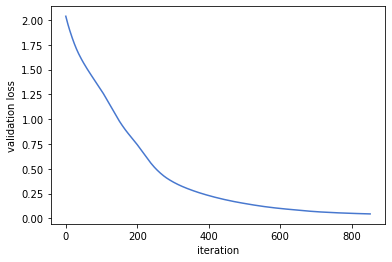

Number of mislabeled samples 3 out of 12
Accuracy: 0.75
              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80         2
         1.0       1.00      0.67      0.80         3
         2.0       0.67      0.67      0.67         3
         3.0       0.67      0.67      0.67         3
         4.0       1.00      1.00      1.00         1

    accuracy                           0.75        12
   macro avg       0.80      0.80      0.79        12
weighted avg       0.78      0.75      0.75        12

confusion matrix
[[2 0 0 0 0]
 [0 2 1 0 0]
 [0 0 2 1 0]
 [1 0 0 2 0]
 [0 0 0 0 1]]


In [9]:
#plotting the loss curve over training iteration 
plt.plot(mlp.loss_curve_)
plt.xlabel('iteration')
plt.ylabel('validation loss')
plt.show()

#print the number of misclassified samples, accuracy and complete report (using scikit learn metric tools) 
print('Number of mislabeled samples %d out of %d' % ((lab_test != lab_predict).sum(),lab_test.size))
print('Accuracy:',sklearn.metrics.accuracy_score(lab_test, lab_predict))
print(sklearn.metrics.classification_report(lab_test, lab_predict))
print('confusion matrix')
print(sklearn.metrics.confusion_matrix(lab_test,lab_predict))

In [10]:
#displaying names of misclassified files
results = lab_test == lab_predict

for index, value in results.items():
    if value == False:
        print(metadata['filename'][index],classes[int(lab_test[index])])

3071420d.wav guitar
b272072e.wav flute
5de123c3.wav clarinet


### Follow-up activities

1. Train again the ANN with the same settings, and observe if/how performances changes. If yes, understand why this is happening.

2. Analyze in details the results displayed above and reconcile these with the classification task and dataset. Look at the accuracy, what gets missclassifies, inspect the trainig process (verbose mode is ON), and the displayed messages. Also, compute the the selected performance metric on the training set and compare with the result on the tests set (assess wheter overfitting or unferfitting may happen).

3. Modify the network to improve the accuracy. You can explore increasing/decreasing the number of layers, the number of neuron per layer, the maximum number of training iterations, the activation function of the neurons (try logistic or tanh), and any other option you think may be relevant (refer to the documentation of MLPClassifier).

4. Try to change the regularization (called alpha) and learning rate (refer to the [MLP Classifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)).

5. Try to work with less features, and use the [Percentile](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile) to decide which to keep out of the 20 MFCC averaged over the entire file duration.

6. Repeat the above explorations with your own dataset and compare the performances with other classifiers included in Workshop 3.

7. Try another classifier on your dataaet, use a classifier included in [scikitlearn](https://scikit-learn.org/stable/supervised_learning.html) but not covered in the workshops and compare the performances with other classifiers included in Workshop 3 (consider making a table as final summary of everything you have tested vs performances).